# Analyzing the Relationship between Wildfires, Air Quality, and Atmospheric CO₂ (2020–2024)

This project explores how wildfire activity across the United States may influence ambient air quality and situates the results in the context of broader climate trends. By examining data from 2020 – 2024, we look at whether years with more wildland fires and acres burned correspond to worse air quality and how these patterns fit within the long‑term rise in atmospheric carbon dioxide. The analysis could help environmental health agencies and policymakers better understand the interplay between climate change–driven hazards and air quality impacts.



## Data sources

* **Wildfire statistics** – Annual counts of wildland fires and acres burned come from the National Interagency Fire Center’s historical table of wildland fires【127707258858993†L308-L317】. Entries for 2020 – 2024 were used.

* **Air quality data** – County‑level annual AQI summary data were downloaded from the U.S. Environmental Protection Agency’s (EPA) *AirData* pre‑generated files repository【295235041241295†L28-L66】【295235041241295†L114-L170】. The annual AQI by county files for 2020 through 2024 were used. These files report, for each county, the number of days with different AQI categories (Good, Moderate, Unhealthy for Sensitive Groups, Unhealthy, Very Unhealthy and Hazardous) and pollutants.

* **Atmospheric CO₂** – Monthly mean carbon dioxide concentrations at Mauna Loa were obtained from NOAA’s Global Monitoring Laboratory【602935728654264†L137-L146】. We computed the mean CO₂ for each year from 2020 through 2024 to provide broader climate context.



## Methodology

The analysis follows these steps:

1. **Data loading.** The EPA air quality files are ZIP archives containing CSV files. For each year (2020–2024), the CSV was read into a pandas DataFrame. The total number of days with AQI was summed across all counties. We calculated the total number of `Unhealthy`, `Very Unhealthy` and `Hazardous` days, summed the `Days PM2.5` column and computed a weighted average of the county median AQI values, where each county’s median AQI was weighted by its number of days with an AQI observation.

2. **Wildfire metrics.** The number of wildfires and acres burned for each year were transcribed from the NIFC table【127707258858993†L308-L317】.

3. **CO₂ averages.** Monthly mean CO₂ observations from Mauna Loa were filtered to retain 2020–2024. A simple average for each year provided annual mean CO₂ concentrations.

4. **Merging and correlation analysis.** The wildfire and air quality summaries were merged by year. Correlation coefficients were computed between variables (e.g., acres burned and weighted median AQI) to explore relationships. Although correlation does not imply causation, it helps identify patterns.

5. **Visualization.** We visualized:
   * Wildfires (number of fires and acres burned) over time.
   * Air quality metrics (unhealthy days and weighted median AQI).
   * Atmospheric CO₂ trend.
   * Scatter plot of weighted median AQI versus acres burned.

The code cells below implement these steps. The generated charts are included as attachments for convenience.



In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

# Path to data directory
DATA_PATH = '/home/oai/share'

# Define years of interest
years = [2020, 2021, 2022, 2023, 2024]

# Lists to hold summaries
summaries = []

for year in years:
    zip_path = f'{DATA_PATH}/annual_aqi_by_county_{year}.zip'
    with zipfile.ZipFile(zip_path) as zf:
        csv_name = [name for name in zf.namelist() if name.endswith('.csv')][0]
        df = pd.read_csv(zf.open(csv_name))
    total_days = df['Days with AQI'].sum()
    unhealthy_days = df[['Unhealthy Days','Very Unhealthy Days','Hazardous Days']].sum().sum()
    pm25_days = df['Days PM2.5'].sum()
    weighted_median = (df['Median AQI'] * df['Days with AQI']).sum() / total_days
    summaries.append(dict(Year=year,
                         Total_Days=int(total_days),
                         Unhealthy_Days=int(unhealthy_days),
                         PM25_Days=int(pm25_days),
                         Weighted_Median_AQI=float(weighted_median)))

summary_df = pd.DataFrame(summaries)
summary_df


In [ ]:
# Wildfire dataset based on NIFC table
wildfire_data = [
    {'Year': 2020, 'Fires': 58950, 'Acres': 10122336},
    {'Year': 2021, 'Fires': 58985, 'Acres': 7125643},
    {'Year': 2022, 'Fires': 68988, 'Acres': 7577183},
    {'Year': 2023, 'Fires': 56580, 'Acres': 2693910},
    {'Year': 2024, 'Fires': 64897, 'Acres': 8924884},
]

wildfire_df = pd.DataFrame(wildfire_data)

# Merge air quality summary with wildfire statistics
merged = summary_df.merge(wildfire_df, on='Year')

# Correlation matrix
corr = merged[['Total_Days','Unhealthy_Days','PM25_Days','Weighted_Median_AQI','Fires','Acres']].corr()
corr


In [ ]:
# Atmospheric CO₂ data
co2 = pd.read_csv(f'{DATA_PATH}/co2_mm_mlo.csv', comment='#')
co2_recent = co2[co2['year'].between(2020, 2024)]
year_avg_co2 = co2_recent.groupby('year')['average'].mean()
year_avg_co2


### Summary of air quality and wildfires (2020–2024)

The table below summarizes the computed metrics for each year. `Total_Days` is the sum of all days with an AQI observation across counties; `Unhealthy_Days` aggregates the counts of Unhealthy, Very Unhealthy and Hazardous days; `PM25_Days` is the total number of days where PM₂.₅ was the primary pollutant; and `Weighted_Median_AQI` is the weighted average of county median AQI values.


In [ ]:
summary_df


### Visualizations

**Wildfires (number of fires and acres burned).**

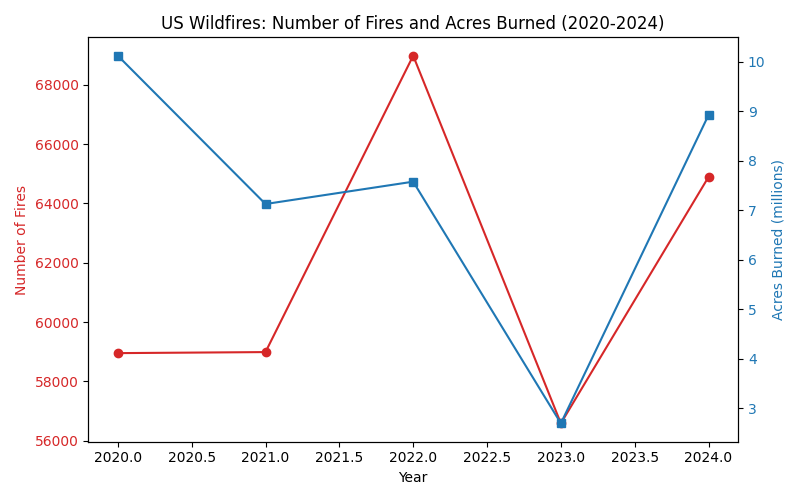

**Air quality metrics**

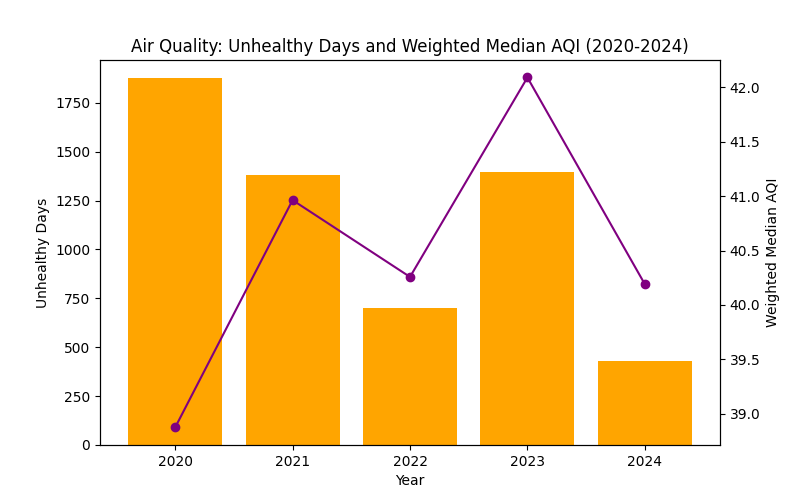

**Atmospheric CO₂**

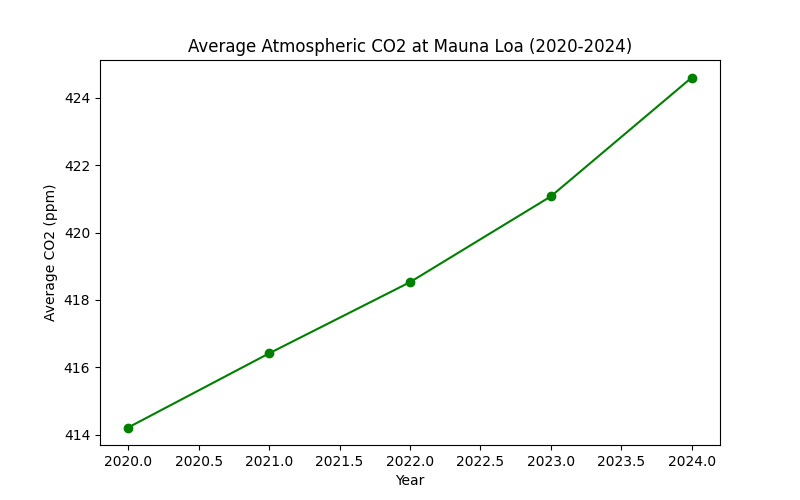

**Weighted median AQI vs. acres burned**

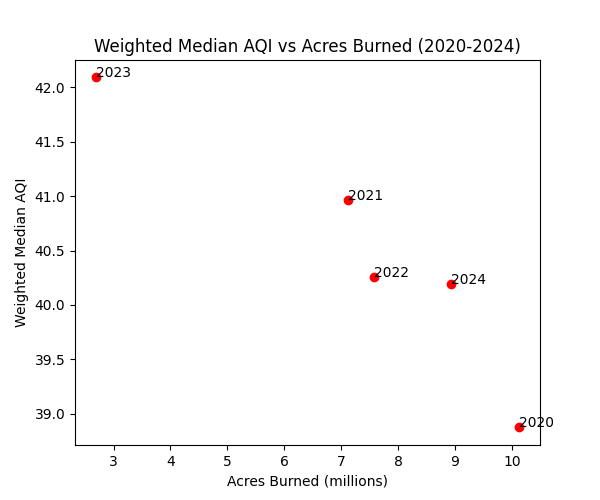

The plots show that while 2020 had the most acres burned, the weighted median AQI was relatively lower than in 2023. There is a modest negative correlation between acres burned and the weighted median AQI, but with only five data points caution is needed when interpreting it. Unhealthy days declined from 2020 to 2022 but increased in 2023; this pattern does not perfectly track wildfire acreage, suggesting that meteorology, other pollutant sources and regional smoke transport also influence AQI outcomes. Atmospheric CO₂ continued its long‑term rise from about 414 ppm in 2020 to over 424 ppm in 2024, underscoring the climate context in which wildfires occur.



## Discussion

The analysis highlights several key points:

* **Wildfire activity fluctuates year‑to‑year.** 2020 experienced nearly 10 million acres burned, while 2023 saw less than 3 million acres. Fire counts also fluctuated, with 2022 showing the highest number of fires.

* **Air quality impacts are complex.** The weighted median AQI and number of unhealthy days do not correlate strongly with acres burned (correlation ≈ −0.94 for acres vs. weighted median AQI). For example, 2023 had relatively few acres burned but the highest weighted median AQI. Meteorological conditions, geographic distribution of fires, and other pollutant sources likely modulate the air quality impacts of wildfires.

* **Climate context matters.** Despite inter‑annual variability in fires and AQI, atmospheric CO₂ concentrations continue to rise. The Mauna Loa measurements climbed from ~414 ppm in 2020 to ~425 ppm in 2024. This upward trend reflects ongoing greenhouse‑gas emissions, which contribute to warmer temperatures and may influence fire regimes.

### Limitations

* The air quality data are aggregated at the county level; they do not capture short‑term spikes in smoke or pollutant transport across state boundaries.
* The analysis covers only five years, so correlation coefficients are sensitive to individual years.
* Wildfire statistics report total acres burned but not smoke production or plume behavior.
* Additional factors such as prescribed burns, weather anomalies and policy interventions are not included.

## Conclusion

This project demonstrates a workflow for integrating disparate environmental datasets — wildfire statistics, air quality records and atmospheric CO₂ measurements — to explore relationships between climate‑driven hazards and air pollution. While preliminary, the findings show that simple correlations between acres burned and national‑scale AQI metrics can be weak, highlighting the need for finer‑scale analyses that consider regional weather patterns and smoke dispersion. Nonetheless, the exercise provides a data‑driven narrative that underscores the growing challenge of wildfires in a warming climate and the importance of continuous air quality monitoring.

